# Complete Case Analysis

Complete Case Analysis (CCA), also known as Listwise Deletion, is a common method for handling missing data. In CCA, any row (case) that has one or more missing values is completely excluded from the analysis. This means that only rows with complete data are used for analysis, and any row with a missing value in any column is discarded.

### When to Use Complete Case Analysis

* **Missing Completely at Random (MCAR):** 
The missing data is unrelated to the observed or unobserved data (i.e., the missingness has no pattern and is purely random). Under this assumption, CCA leads to unbiased estimates, though it may reduce statistical power by decreasing the sample size.
* **Small percentage of missing values:**
If only a small portion of the data is missing (e.g., <5% missing data), CCA can be a simple and effective approach.

In [1]:
import seaborn as sns

# Load Titanic dataset
df_titanic = sns.load_dataset('titanic')

In [10]:
# View missing data
print("Original DataFrame:")
print(df_titanic.isnull().mean()*100)

Original DataFrame:
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [13]:
cols = [var for var in df_titanic.columns if df_titanic[var].isnull().mean() < 0.05 and df_titanic[var].isnull().mean() > 0]
cols

['embarked', 'embark_town']

In [14]:
df_titanic[cols].sample(5)

,embarked,embark_town
825,Q,Queenstown
49,S,Southampton
289,Q,Queenstown
741,S,Southampton
640,S,Southampton


In [15]:
df_titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [16]:
# Perform Complete Case Analysis
len(df_titanic[cols].dropna()) / len(df_titanic)

0.9977553310886644

In [17]:
new_df =df_titanic[cols].dropna()
df_titanic.shape, new_df.shape

((891, 15), (889, 2))

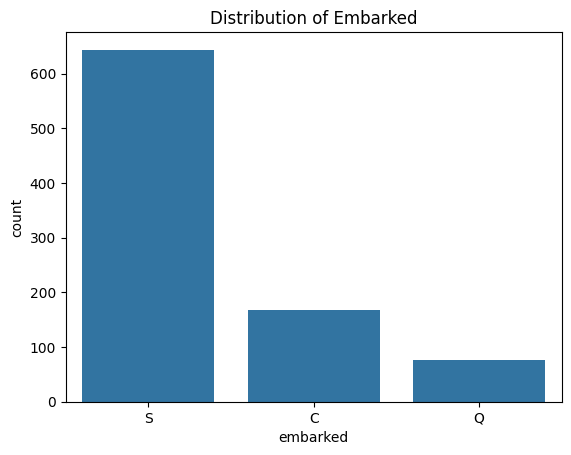

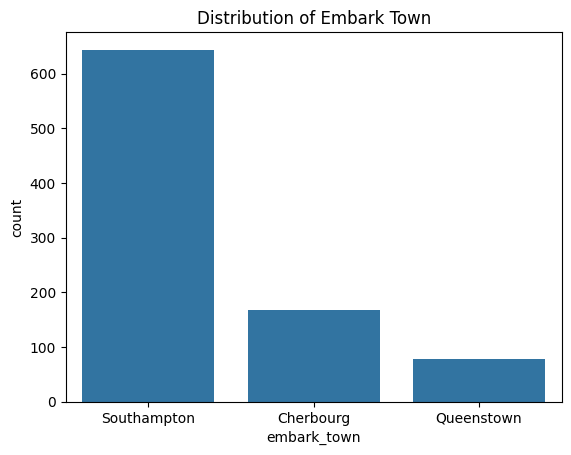

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'embarked' column
sns.countplot(x='embarked', data=df_titanic)
plt.title('Distribution of Embarked')
plt.show()

# Plot the distribution of the 'embark_town' column
sns.countplot(x='embark_town', data=df_titanic)
plt.title('Distribution of Embark Town')
plt.show()

In [22]:
import pandas as pd
temp = pd.concat([
            # percentage of observations per category, original data
            df_titanic['embarked'].value_counts() / len(df_titanic),

            # percentage of observations per category, cca data
            new_df['embarked'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
embarked,,
S,0.722783,0.724409
C,0.188552,0.188976
Q,0.086420,0.086614
